In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('train.csv')

In [22]:
df.shape

(42000, 785)

In [20]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [21]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
29913      6       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
29913       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
29913         0         0         0         0         0  

[1 rows x 785 columns]

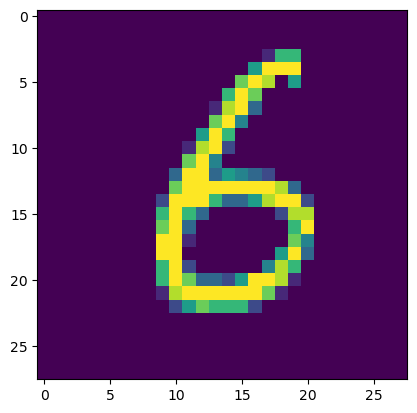

In [26]:
plt.imshow(np.array(df.iloc[18036,1:]).reshape(28,28))

In [30]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
X_test = np.array(X_test)

In [50]:
import time
start = time.time()

y_pred = knn.predict(X_test)

print('Time Taken:', time.time() - start)

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Time Taken: 16.23372173309326


In [51]:
from sklearn.metrics import accuracy_score

print('Accuracy:',accuracy_score(y_pred, y_test))

Accuracy: 0.9648809523809524


In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [101]:
X_test = scaler.transform(X_test)

In [124]:
from sklearn.decomposition import PCA
pca = PCA()

In [125]:
X_train_trf = pca.fit_transform(X_train)

In [126]:
X_test_trf = pca.transform(X_test)

In [127]:
y_pred1 = knn.fit(X_train_trf, y_train).predict(X_test_trf)

In [128]:
print('Accuracy:',accuracy_score(y_pred1, y_test))

Accuracy: 0.9391666666666667


In [78]:
def pca_model(n_components):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=n_components)
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    start = time.time()
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    duration = time.time() - start
    
    print(f'Accuracy with {n_components} PC: {accuracy_score(y_pred, y_test)}\n took {np.round(duration,2)} seconds')

In [79]:
pca_model(n_components=500)

Accuracy with 500 PC: 0.9415476190476191
 took 5.18 seconds


In [80]:
pca_model(n_components=200)

Accuracy with 200 PC: 0.9504761904761905
 took 2.32 seconds


In [81]:
pca_model(n_components=100)

Accuracy with 100 PC: 0.9546428571428571
 took 1.68 seconds


In [83]:
pca_model(n_components=50)

Accuracy with 50 PC: 0.9532142857142857
 took 1.2 seconds


In [86]:
pca_model(n_components=400)

Accuracy with 400 PC: 0.9439285714285715
 took 5.51 seconds


In [89]:
# for i in range(1,785):
#    pca_model(n_components=i)

In [109]:
X_train_trf

array([[-2.71865112, -0.49006196],
       [-0.67696826, -6.75240443],
       [-3.03322008,  6.50998301],
       ...,
       [ 2.14885938,  0.78095203],
       [ 1.05954997,  0.94705477],
       [17.7025901 ,  1.96201465]])

In [110]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                 )
fig.show()

c:\Users\SUNIL\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [116]:
X_train_trf

array([[-2.71862007, -0.48918994,  1.13608247],
       [-0.67702839, -6.75430187, -2.33557399],
       [-3.03318899,  6.51121791,  7.49227595],
       ...,
       [ 2.14885966,  0.78117586, -0.74792547],
       [ 1.05959286,  0.94806033,  3.9498655 ],
       [17.70256856,  1.96071632, -4.94423941]])

In [118]:
fig = px.scatter_3d(x=X_train_trf[:,0],
                    y=X_train_trf[:,1],
                    z=X_train_trf[:,2],
                    color=y_train_trf,
                    )
fig.update_layout(
    margin=dict(l=20, t=20, b=20)
)

fig.show()

c:\Users\SUNIL\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [130]:
pca.explained_variance_.shape

(784,)

In [131]:
pca.components_.shape

(784, 784)

In [133]:
np.cumsum(pca.explained_variance_ratio_*100)

array([  5.78519225,   9.93446193,  13.73870094,  16.70496371,
        19.2865254 ,  21.54150558,  23.5145736 ,  25.28985357,
        26.85850424,  28.29456752,  29.66482235,  30.89207736,
        32.03898935,  33.16201674,  34.22054559,  35.24047664,
        36.1981528 ,  37.14086161,  38.05335104,  38.94352123,
        39.78346173,  40.60352492,  41.38882815,  42.14556786,
        42.88282888,  43.58471353,  44.28263326,  44.95373775,
        45.59358278,  46.22392007,  46.83927092,  47.44165957,
        48.02533355,  48.6038813 ,  49.17621445,  49.72261423,
        50.2658216 ,  50.79399435,  51.30737609,  51.80139157,
        52.28906267,  52.77104144,  53.23924587,  53.69858836,
        54.15624919,  54.60546821,  55.05015043,  55.49169118,
        55.92680312,  56.35883605,  56.78064492,  57.19888804,
        57.60688239,  58.00888731,  58.40722316,  58.80182197,
        59.18869358,  59.57188877,  59.94844139,  60.32263485,
        60.68748701,  61.04828955,  61.402176  ,  61.75

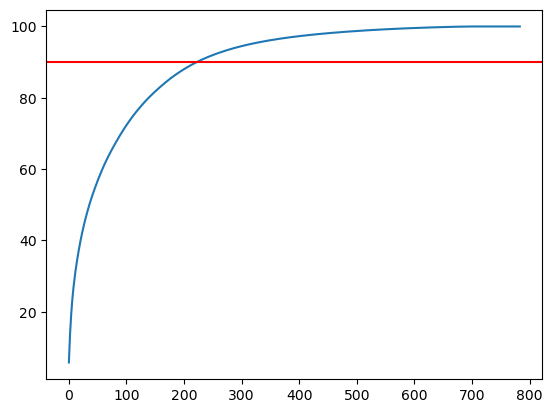

In [151]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.axhline(y=90, color='red')